In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
import os
import json
from fastbook import search_images_bing, download_url

if uploaded:
  api_key = json.loads(uploaded.get('colab_keys.json')).get('AZURE_API_KEY')
else:
  api_key = os.environ.get("AZURE_API_KEY", 'XXX')


In [ ]:
! [ -e /content ] && pip install -Uqq fastbook


     |████████████████████████████████| 719 kB 15.6 MB/s 
     |████████████████████████████████| 365 kB 46.1 MB/s 
     |████████████████████████████████| 1.3 MB 23.0 MB/s 
     |████████████████████████████████| 4.7 MB 30.8 MB/s 
     |████████████████████████████████| 101 kB 5.4 MB/s 
     |████████████████████████████████| 212 kB 33.1 MB/s 
     |████████████████████████████████| 141 kB 28.0 MB/s 
     |████████████████████████████████| 115 kB 37.6 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████████████████████| 127 kB 61.2 MB/s 
     |████████████████████████████████| 6.6 MB 43.8 MB/s 


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving colab_keys.json to colab_keys.json


In [ ]:
import os
import json
from fastbook import search_images_bing, download_url

if uploaded:
  api_key = json.loads(uploaded.get('colab_keys.json')).get('AZURE_API_KEY')
else:
  api_key = os.environ.get("AZURE_API_KEY", 'XXX')


In [ ]:
from fastai.vision.all import *
import fastbook as fb

In [ ]:
path = fb.untar_data(fb.URLs.MNIST_SAMPLE)
fb.Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('valid'),Path('train'),Path('labels.csv')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = fb.Image.open(im3_path)
im3

In [ ]:
fb.array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
fb.tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
im3_t = fb.tensor(im3)
df = fb.pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
seven_tensors = [fb.tensor(fb.Image.open(o)) for o in sevens]
three_tensors= [fb.tensor(fb.Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)


(6131, 6265)

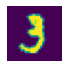

In [ ]:
fb.show_image(three_tensors[0])

In [ ]:
stacked_sevens = fb.torch.stack(seven_tensors).float()/255
stacked_threes = fb.torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

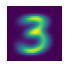

In [ ]:
mean3 = stacked_threes.mean(0)
fb.show_image(mean3)

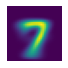

In [ ]:
mean7 = stacked_sevens.mean(0)
fb.show_image(mean7)

In [ ]:
a_3 = stacked_threes[0]
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1074), tensor(0.1912))

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1441), tensor(0.2780))

In [ ]:
valid_3_tens = fb.torch.stack([fb.tensor(fb.Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = fb.torch.stack([fb.tensor(fb.Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a, b): return (a-b).abs().mean((-2, -1)) # mean of last 2 axes (not depth/images)
mnist_distance(a_3, mean3)

tensor(0.1074)

In [ ]:
mnist_distance(valid_3_tens, mean3)

tensor([0.1678, 0.1611, 0.1358,  ..., 0.1170, 0.1779, 0.1179])

In [ ]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [ ]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [ ]:
is_3(valid_7_tens)

tensor([False, False, False,  ..., False, False, False])

In [ ]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
def f(x): return x**2

xt = fb.tensor(3.).requires_grad_()
yt = f(xt)
yt.backward()
xt.grad

tensor(6.)

In [ ]:
time = fb.torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

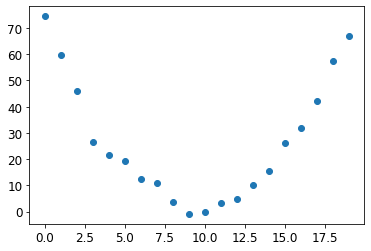

In [ ]:
speed = fb.torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
fb.plt.scatter(time,speed);

In [ ]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c


In [ ]:
def mse(preds, targets): 
  return ((preds - targets)**2).mean()

In [ ]:
# Initialize Parameters
params = fb.torch.randn(3).requires_grad_()
orig_params = params.clone()
orig_params

tensor([-0.7658, -0.7506,  1.3525], grad_fn=<CloneBackward0>)

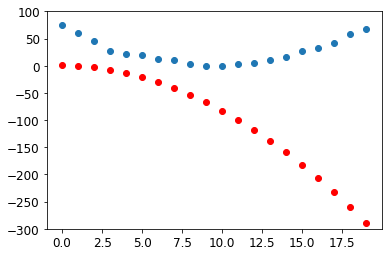

In [ ]:
# Calculate Predictions
preds = f(time, params)

def show_preds(preds, ax=None):
  if ax is None: ax=fb.plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, fb.to_np(preds), color='red')
  ax.set_ylim(-300, 100)

show_preds(preds)

In [ ]:
# Calculate the Loss
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [ ]:
# Calculate the Gradients
loss.backward()
print(params.grad)


tensor([-53195.8633,  -3419.7148,   -253.8908])


In [ ]:
# Step the Weights
learning_rate = 1e-5
params.data -= params.grad.data * learning_rate
params.grad = None
params.data

tensor([-0.2339, -0.7164,  1.3551])

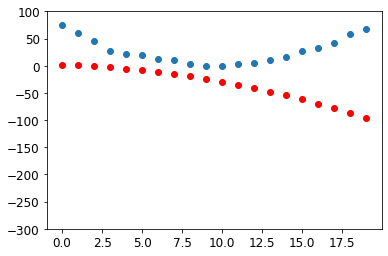

In [ ]:
# Repeat
preds = f(time, params)
mse(preds, speed)
show_preds(preds)

In [ ]:
# Create Function to Iterate
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= learning_rate * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

In [ ]:
for i in range(10): preds = apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


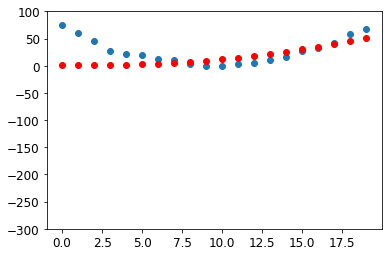

In [ ]:
show_preds(preds)

In [ ]:
params = orig_params.detach().requires_grad_()

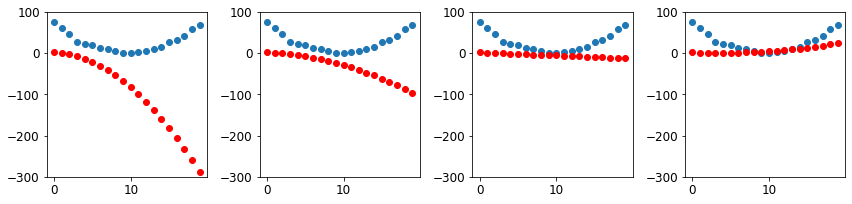

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [ ]:
# Implement Neural Net from Scratch

# concatenate threes and sevens data and flatten tensor into a rank-2 tensor (images flattened to vectors)
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)



In [ ]:
# create training data for flattened training data (True for 3s, False for 7s)
train_y = tensor([1] * len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
# Torch Datasets require tuple (x, y) so zip training data together
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
# initialize random weights for every pixel
def init_params(size, std=1.0): 
  return (fb.torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 1))
weights[:10]

tensor([[ 1.3123],
        [ 0.6872],
        [-1.0892],
        [-0.3553],
        [-0.9138],
        [-0.6581],
        [ 0.0780],
        [ 0.5258],
        [ 1.1790],
        [-0.4345]], grad_fn=<SliceBackward0>)

In [ ]:
# parameters: y = weights*x + bias
bias = init_params(1)
bias

tensor([0.6863], requires_grad=True)

In [ ]:
# calculate a prediction for the 1st image
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [ ]:
# matrix multiplication in python uses '@'
def linear1(xb): return xb @ weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [ ]:
corrects.float().mean().item()

0.4912068545818329

In [ ]:
with torch.no_grad():
  weights[0] *= 1.001

In [ ]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [ ]:
trgts = fb.tensor([1,0,1])
prds = fb.tensor([.9,.4,.2])

In [ ]:
# returns accuracy of the prediction relating to the target
def mnist_loss(predictions, targets):
  # torch.where is the same thing as running a list comprehension
  return fb.torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
fb.torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [ ]:
# Sigmoid: always returns number between 0 and 1
def sigmoid(x):
  return 1/(1+fb.torch.exp(-x))

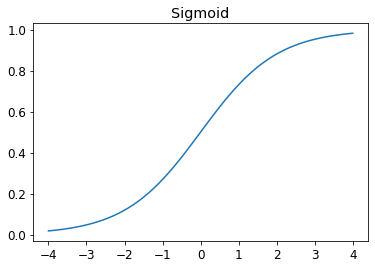

In [ ]:
fb.plot_function(fb.torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
# update mnist Loss function to apply sigmoid
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return fb.torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
# SBG and Mini-Batches

In [ ]:
# Use Dataloaders to randomly shuffle the collections and create minibatches
coll = range(15)
dl = fb.DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
# make sure the data loader contains the Dep and Indep variables (data, target)

ds = fb.L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl = fb.DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [ ]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [ ]:
dl = fb.DataLoader(dset, batch_size=256)
xb,yb = fb.first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = fb.DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss


tensor(0.7419, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [ ]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [ ]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [ ]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [ ]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [ ]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(fb.torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.5265

In [ ]:
# train for 1 epoch
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6664

In [ ]:
# train for 20 more epochs
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.8265 0.89 0.9183 0.9276 0.9398 0.9466 0.9505 0.9525 0.9559 0.9578 0.9598 0.9608 0.9613 0.9618 0.9632 0.9637 0.9647 0.9657 0.9671 0.9676 

In [ ]:
# Creating an Optimizer
linear_model = fb.nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self, params, lr): 
    self.params = list(params) 
    self.lr = lr

  def step(self, *args, **kwargs):
    for p in self.params: 
      p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.6967

In [ ]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.4932 0.7974 0.8525 0.9165 0.9355 0.9472 0.957 0.9629 0.9658 0.9668 0.9697 0.9712 0.9746 0.9751 0.9761 0.977 0.9775 0.978 0.978 0.9785 

In [ ]:
linear_model = fb.nn.Linear(28*28, 1)
opt = fb.SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.9145 0.8008 0.9062 0.9306 0.9443 0.9541 0.9619 0.9643 0.9668 0.9692 0.9712 0.9731 0.9746 0.9756 0.9761 0.9775 0.9775 0.9785 0.9785 

In [ ]:
dls = fb.DataLoaders(dl, valid_dl)

In [ ]:
learn = fb.Learner(
    dls, 
    fb.nn.Linear(28*28, 1), 
    opt_func=fb.SGD,
    loss_func=mnist_loss,
    metrics=batch_accuracy
    )

In [ ]:
learn.fit(n_epoch=10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636856,0.503651,0.495584,00:00
1,0.596260,0.160360,0.876349,00:00
2,0.216385,0.199107,0.818449,00:00
3,0.093193,0.111049,0.910697,00:00
4,0.047861,0.079654,0.932287,00:00
5,0.030258,0.063328,0.946025,00:00
6,0.023103,0.053282,0.954858,00:00
7,0.019990,0.046627,0.961236,00:00
8,0.018458,0.041969,0.965162,00:00
9,0.017566,0.038557,0.967615,00:00


In [ ]:

def simple_net(xb):
  res = xb @ w1 + b1
  res = res.max(tensor(0.0))